In [4]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("Dataset\pet_supplies_2212.csv")

In [6]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [7]:
df.tail()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
1495,1496,Food,Bird,medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5.0,0
1497,1498,Food,Fish,Small,25.79,724.02,3.0,0
1498,1499,Medicine,Fish,small,19.94,658.66,5.0,1
1499,1500,Food,Cat,Medium,25.95,826.08,4.0,1


In [8]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [9]:
# Shape of the data
df.shape

(1500, 8)

In [10]:
# Check for missing values
df.isnull().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

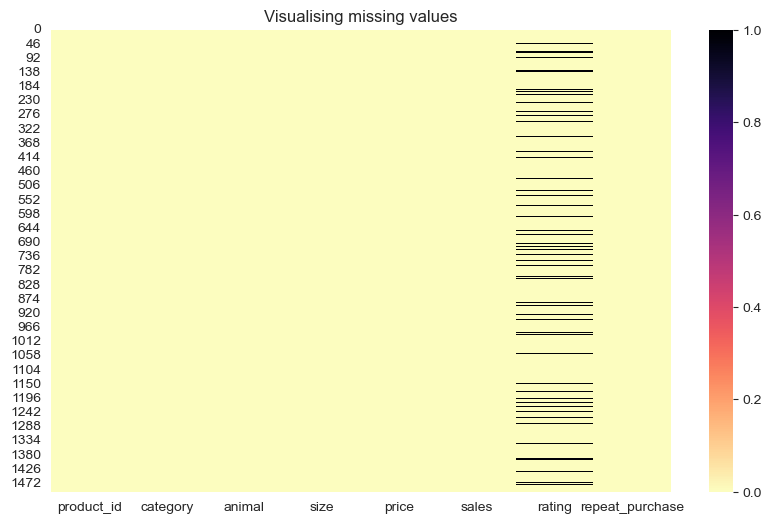

In [11]:
# Visualise missing values
plt.figure(figsize = (10, 6))
sns.heatmap(df.isnull(),cbar = True, cmap = 'magma_r')
plt.title('Visualising missing values')
plt.show()

In [12]:
# check columns
df.columns

Index(['product_id', 'category', 'animal', 'size', 'price', 'sales', 'rating',
       'repeat_purchase'],
      dtype='object')

In [13]:
# check the data types
df.dtypes

product_id           int64
category            object
animal              object
size                object
price               object
sales              float64
rating             float64
repeat_purchase      int64
dtype: object

## Data Manipulation and Validation
- Handle the missing values for rating by using the ffill method to replace the null values in rating, and replace the null values with 0 respectively.
- Treat 'unlisted' in the price column as a missing value, and it will be replaced with the overall median price.
- Treat 'N/A' in the rating column as a missing value, and it will be replaced with 0.
- Replace the missing value in Category with unknown.
- Convert rating to int.
- Convert price and sales to 2-decimal places


In [14]:
# check the columns that categorical and numerical 
numerical_cols = df.select_dtypes(include=['int64', 'float']).columns.tolist()
numerical_cols

['product_id', 'sales', 'rating', 'repeat_purchase']

In [15]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols


['category', 'animal', 'size', 'price']

In [16]:
# value counts for categorical variables 
for column in categorical_cols:
    print(df[column].value_counts())

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: int64
Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64
small     372
medium    233
Small     225
SMALL     157
Medium    150
large     122
MEDIUM    109
Large      75
LARGE      57
Name: size, dtype: int64
unlisted    150
22.98        13
28           10
28.03         8
19.94         8
           ... 
38.66         1
36            1
19.97         1
39.19         1
25.79         1
Name: price, Length: 707, dtype: int64


In [17]:
# value counts for numerical variables 
for column in numerical_cols:
    print(df[column].value_counts())

1       1
998     1
1007    1
1006    1
1005    1
       ..
498     1
497     1
496     1
495     1
1500    1
Name: product_id, Length: 1500, dtype: int64
1034.36    3
742.87     2
1342.90    2
1031.11    2
1348.27    2
          ..
1072.20    1
727.87     1
1460.29    1
1196.56    1
826.08     1
Name: sales, Length: 1476, dtype: int64
5.0    304
6.0    299
4.0    283
3.0    190
7.0    143
8.0     61
2.0     43
9.0     15
1.0     12
Name: rating, dtype: int64
1    906
0    594
Name: repeat_purchase, dtype: int64


## Manipulation and Validation of Categorical columns


In [18]:
# Replace "-" with "unknown"
df['category'] = df['category'].replace('-', 'unknown')

# Count the number of occurrences of "unknown" in the column
num_unknown = (df['category'] == 'unknown').sum()
print(f"{num_unknown} occurrences of 'unknown' found")


25 occurrences of 'unknown' found


In [46]:
# Define a dictionary to map the old size names to new size names
size_mapping = {
    'Small': 'Small',                                                                     
     'small': 'Small',                                                  
     'SMALL': 'Small',                                                                    
     'Medium': 'Medium',                                     
      'MEDIUM': 'Medium',                                            
      'medium': 'Medium',                                    
     'large': 'Large',
    'Large': 'Large',
    'LARGE': 'Large'
}

# Replace the old size names with new size names using the map() function and the size_mapping dictionary
df['size'] = df['size'].map(size_mapping)

# Display the updated DataFrame
print(df)

      product_id   category animal    size  price    sales  rating  \
0              1       Food   Bird   Large   51.1  1860.62     7.0   
1              2    Housing   Bird  Medium  35.98   963.60     6.0   
2              3       Food    Dog  Medium  31.23   898.30     5.0   
3              4   Medicine    Cat   Small  24.95   982.15     6.0   
4              5    Housing    Cat   Small  26.18   832.63     7.0   
...          ...        ...    ...     ...    ...      ...     ...   
1495        1496       Food   Bird  Medium  40.91  1203.36     5.0   
1496        1497  Equipment    Dog   Small  32.89  1099.97     5.0   
1497        1498       Food   Fish   Small  25.79   724.02     3.0   
1498        1499   Medicine   Fish   Small  19.94   658.66     5.0   
1499        1500       Food    Cat  Medium  25.95   826.08     4.0   

      repeat_purchase  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1  
...            

In [19]:
## Manipulation & validation of categorical columns
df['rating'].fillna(0, inplace=True)

In [62]:
# Replace "unlisted" with NaN in the 'price' column
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Standardize casing in the 'size' column
df['size'] = df['size'].str.lower()


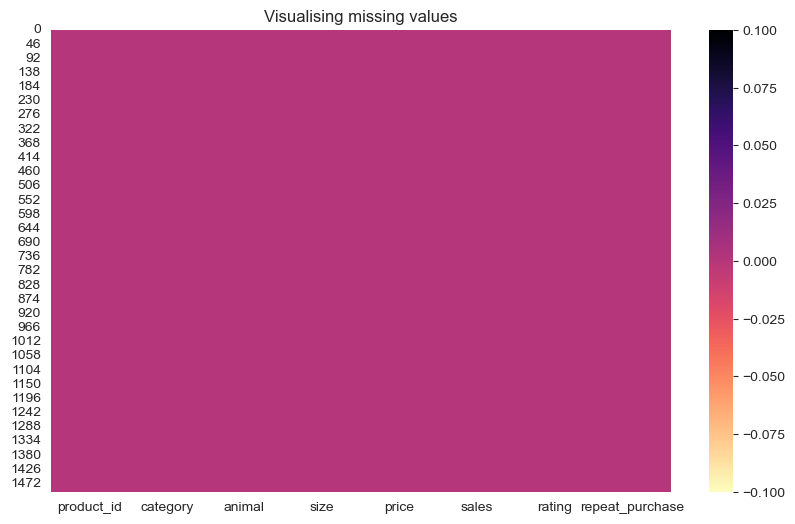

In [63]:
# Visualise missing values
plt.figure(figsize = (10, 6))
sns.heatmap(df.isnull(),cbar = True, cmap = 'magma_r')
plt.title('Visualising missing values')
plt.show()

## Manipulation and Validation of numerical columns


In [64]:
# Calculate the median price value
median_price = df['price'].median()

# Replace missing values with median price value
df['price'].fillna(median_price, inplace=True)

In [65]:
df[df['rating'] == 0].head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
20,21,Food,Fish,medium,28.06,542.06,0.0,0
44,45,Medicine,Bird,medium,28.06,1209.41,0.0,0
46,47,Toys,Cat,small,28.06,1367.47,0.0,1
70,71,Equipment,Dog,large,28.06,1446.43,0.0,0
73,74,Food,Bird,large,28.06,1864.01,0.0,0


In [25]:
# Round sales and prices to 2 decimal places
df['sales'] = df['sales'].apply(lambda x: round(x, 2) if isinstance(x, float) and x.as_integer_ratio()[1] != 1 else x)
df['price'] = df['price'].apply(lambda x: round(x, 2) if isinstance(x, float) and x.as_integer_ratio()[1] != 1 else x)


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 93.9+ KB


## Exploratory Data Analysis


In [67]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.10,1860.62,7.0,1
1,2,Housing,Bird,medium,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,small,26.18,832.63,7.0,1


## Univariates Analysis

In [68]:
# Calculate summary satistics for all numerical column
df.describe().astype('int')

,product_id,price,sales,rating,repeat_purchase
count,1500,1500,1500,1500,1500
mean,750,29,996,4,0
std,433,7,323,2,0
min,1,12,286,0,0
25%,375,25,747,3,0
50%,750,28,1000,5,1
75%,1125,33,1158,6,1
max,1500,54,2255,9,1


#### OBSERVATION: 
##### product_id: Ranges from 1 to 1500, which matches our dataset size, indicating unique product identifiers.
##### price: The average price of the products is approximately $29. Prices range from $12 to $54.
##### sales: The average sales value is around $996, with a minimum value of $286 and a maximum value of $2255.
##### rating: Product ratings range from 1 to 9, with an average rating of approximately 4.
##### repeat_purchase: This is a binary column with values of either 0 (not a repeat purchase) or 1 (repeat purchase). .

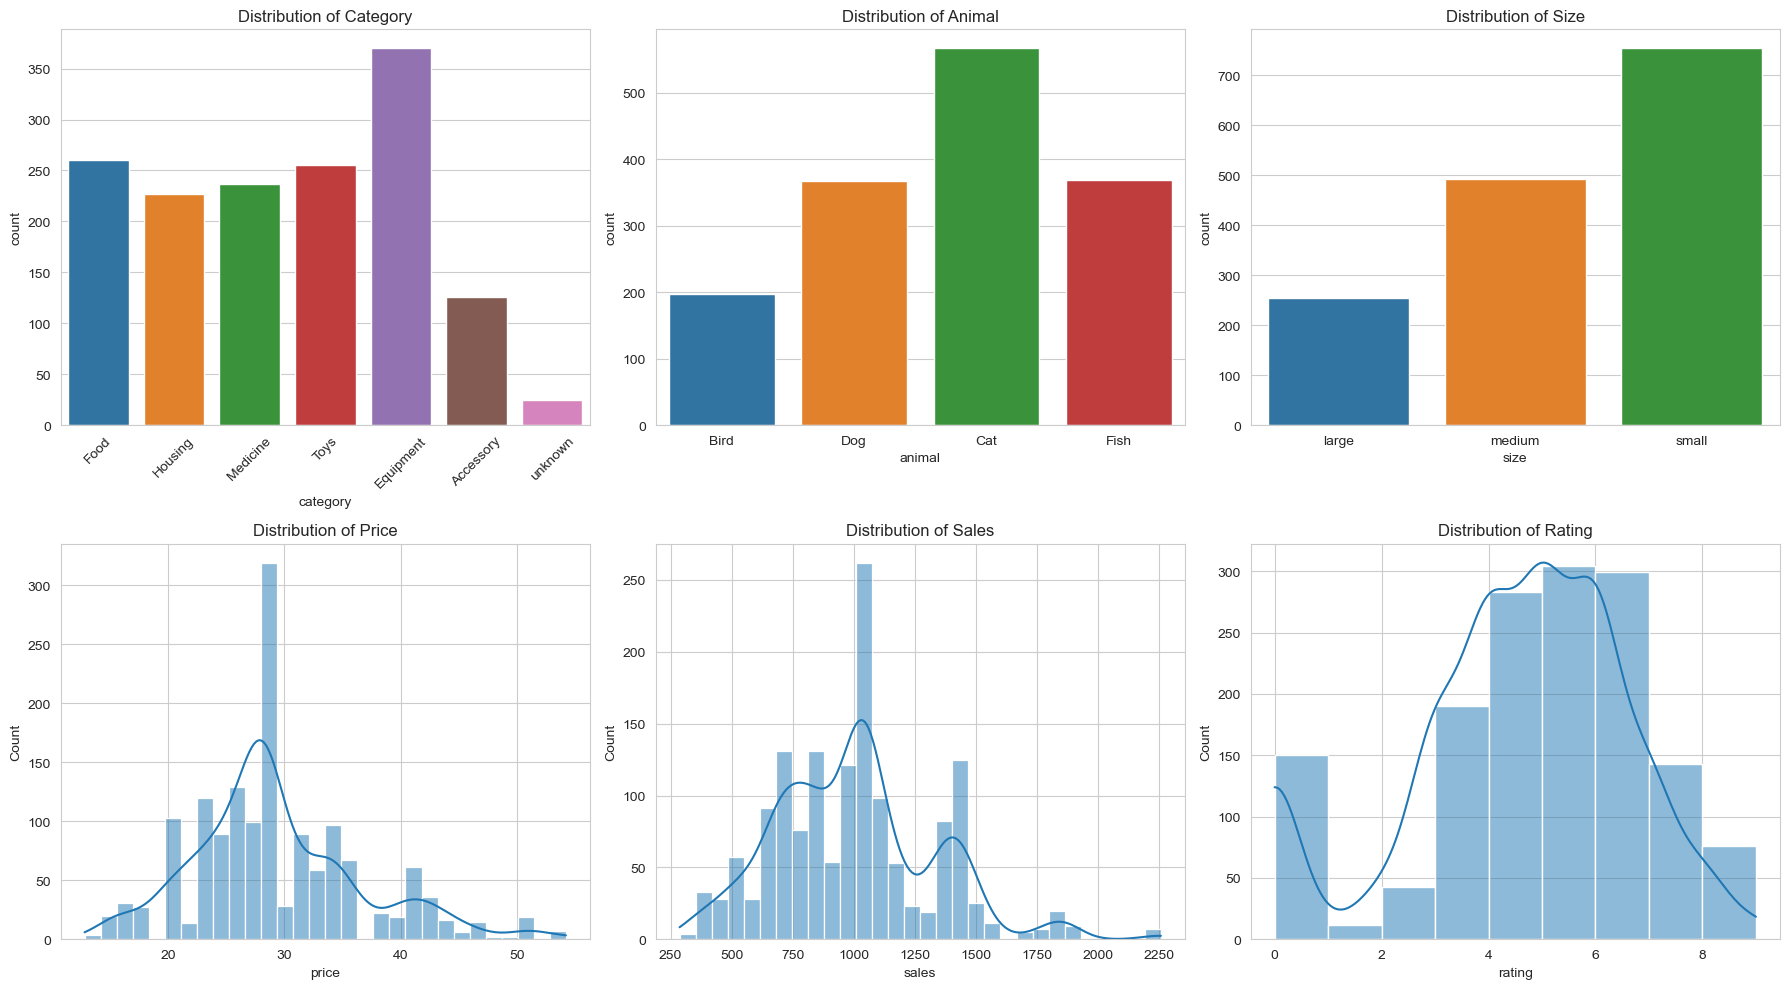

In [72]:
# Set up the figure and axes
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

# Univariate analysis for categorical variables
sns.countplot(data=df, x='category', ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Category')
ax[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='animal', ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Animal')

sns.countplot(data=df, x='size', ax=ax[0, 2])
ax[0, 2].set_title('Distribution of Size')

# Univariate analysis for continuous variables
sns.histplot(data=df, x='price', bins=30, ax=ax[1, 0], kde=True)
ax[1, 0].set_title('Distribution of Price')

sns.histplot(data=df, x='sales', bins=30, ax=ax[1, 1], kde=True)
ax[1, 1].set_title('Distribution of Sales')

sns.histplot(data=df, x='rating', bins=9, ax=ax[1, 2], kde=True)
ax[1, 2].set_title('Distribution of Rating')

plt.tight_layout()
plt.show()



#### Category:The majority of products fall under the "Food" category, followed by "Housing" and "Medicine".
#### The "Unknown" category has the least number of products.
#### Animal:The products are mostly targeted towards "Dogs" and "Cats", with fewer products for "Birds" and "Fish".
#### Size:"Medium" sized products are the most common, followed by "Small" and "Large".
##### price: The distribution is slightly right-skewed with a concentration of products in the $25 to $30 range..
##### Sales: The distribution is approximately normal with a peak around 1000.
##### Rating: Most products have ratings between 4 and 6, with fewer products having very low or very high ratings.

In [74]:
# count of repeat purchases
df['repeat_purchase'].value_counts()

1    906
0    594
Name: repeat_purchase, dtype: int64

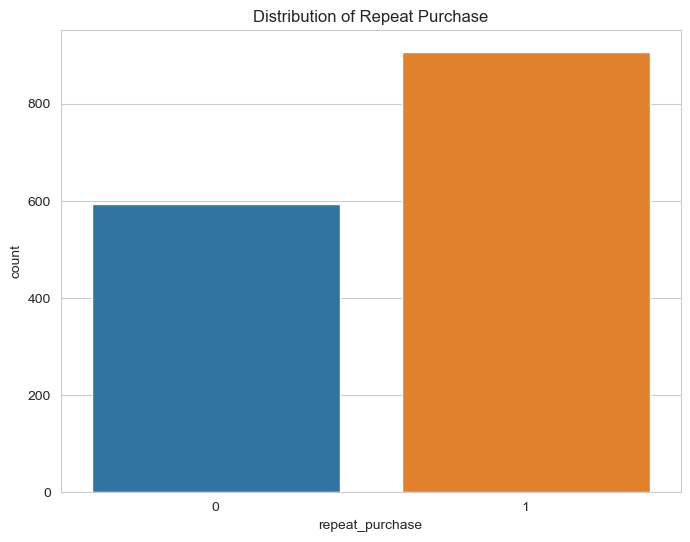

In [73]:
#   repeat_purchase
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='repeat_purchase')
plt.title('Distribution of Repeat Purchase')
plt.show()


#### The chart shows that there are 906 products that have been purchased multiple times, as indicated by the value of 1 in the 'repeat_purchase' column. On the other hand, there are 594 products that have not been purchased more than once, as indicated by the value of 0 in the same column.

In [30]:
# Count the number of unique product_id
df['product_id'].nunique()

1500

In [31]:
# Count of products in each category
category_counts = df['category'].value_counts()

print(category_counts)

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
unknown       25
Name: category, dtype: int64


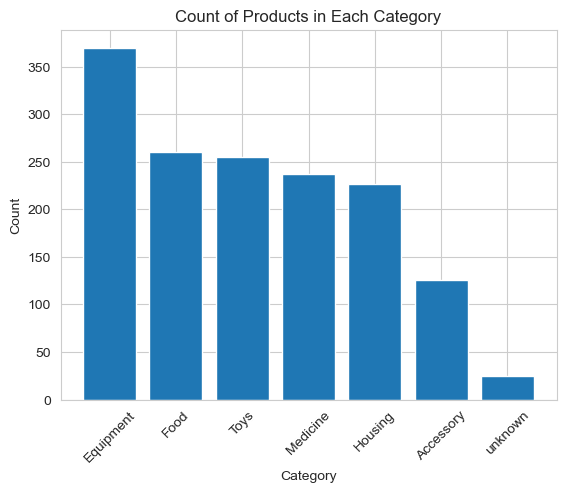

In [32]:
category_counts = df['category'].value_counts()

# Create a bar chart
plt.bar(category_counts.index, category_counts.values)

# Set chart title and axis labels
plt.title('Count of Products in Each Category')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()

In [33]:
# count of products for each animal category
animal_counts = df['animal'].value_counts()

print(animal_counts)

Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64


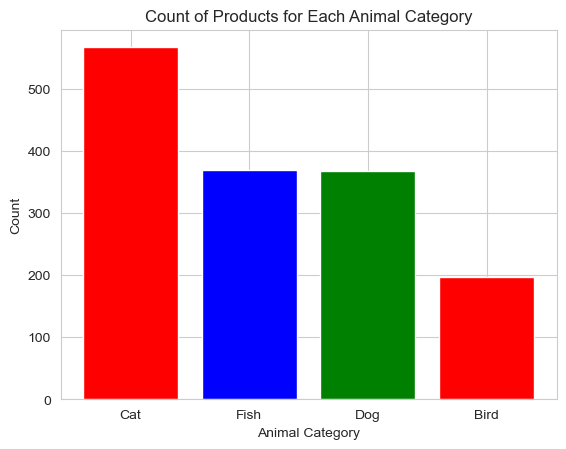

In [34]:
# Create a bar chart
plt.bar(animal_counts.index, animal_counts.values, color=['red', 'blue', 'green'])

# Set chart title and axis labels
plt.title('Count of Products for Each Animal Category')
plt.xlabel('Animal Category')
plt.ylabel('Count')

# Display the chart
plt.show()

## Bivariates Analysis


In [57]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.1,1860.62,7.0,1
1,2,Housing,Bird,Medium,35.98,963.60,6.0,0
2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


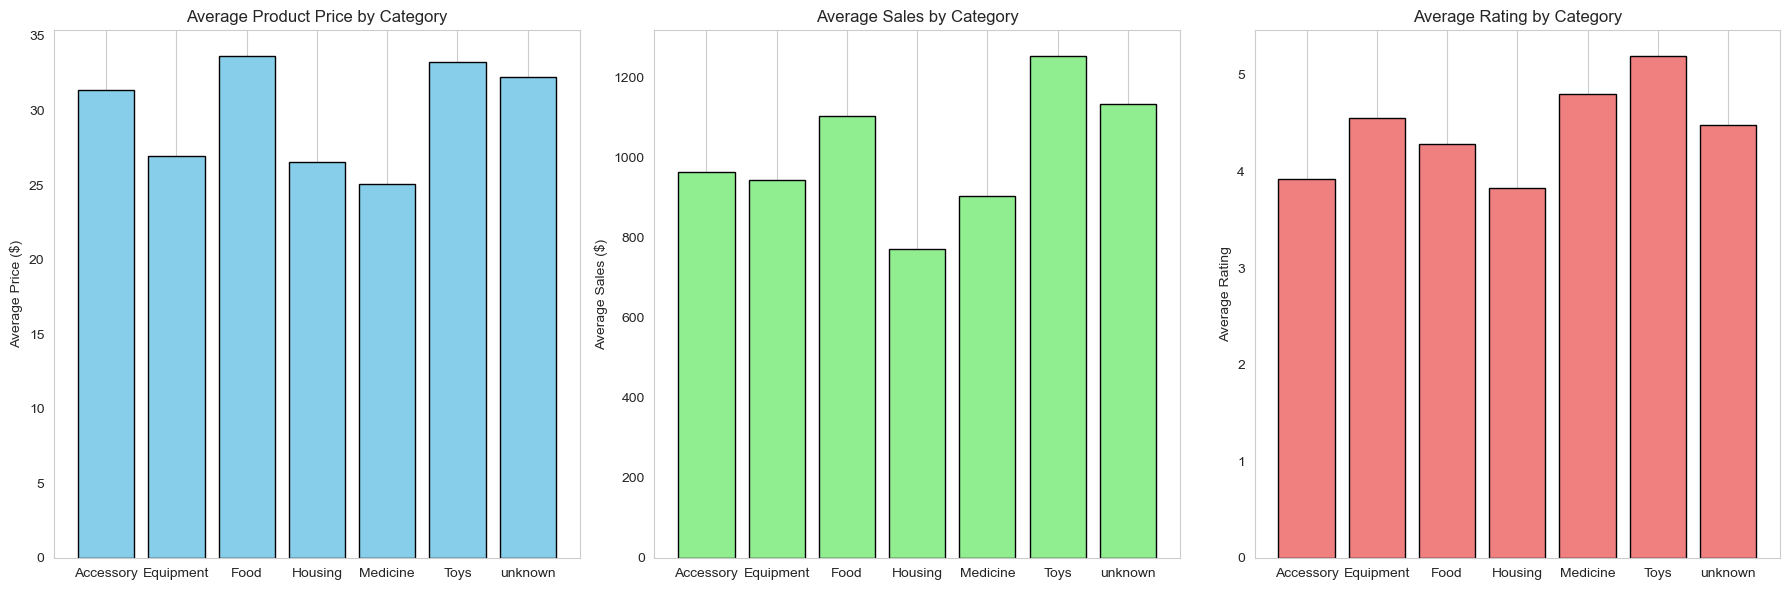

In [82]:
# Group by category and calculate average values
avg_by_category = df.groupby('category').agg({
    'price': 'mean',
    'sales': 'mean',
    'rating': 'mean'
}).reset_index()

# Plot bivariate analysis by category
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Average product price by category
axes[0].bar(avg_by_category['category'], avg_by_category['price'], color='skyblue', edgecolor='black')
axes[0].set_title('Average Product Price by Category')
axes[0].set_ylabel('Average Price ($)')
axes[0].grid(axis='y')

# Average sales by category
axes[1].bar(avg_by_category['category'], avg_by_category['sales'], color='lightgreen', edgecolor='black')
axes[1].set_title('Average Sales by Category')
axes[1].set_ylabel('Average Sales ($)')
axes[1].grid(axis='y')

# Average rating by category
axes[2].bar(avg_by_category['category'], avg_by_category['rating'], color='lightcoral', edgecolor='black')
axes[2].set_title('Average Rating by Category')
axes[2].set_ylabel('Average Rating')
axes[2].grid(axis='y')

plt.tight_layout()
plt.show()




#### Average Product Price: "Medicine" has the highest average price, followed by "Housing" and "Food."
#### Average Sales: "Housing" products generate the highest sales on average, followed closely by "Food" and "Medicine."
#### Average Rating: Ratings are fairly consistent across categories, with "Medicine" having a slightly lower average rating.

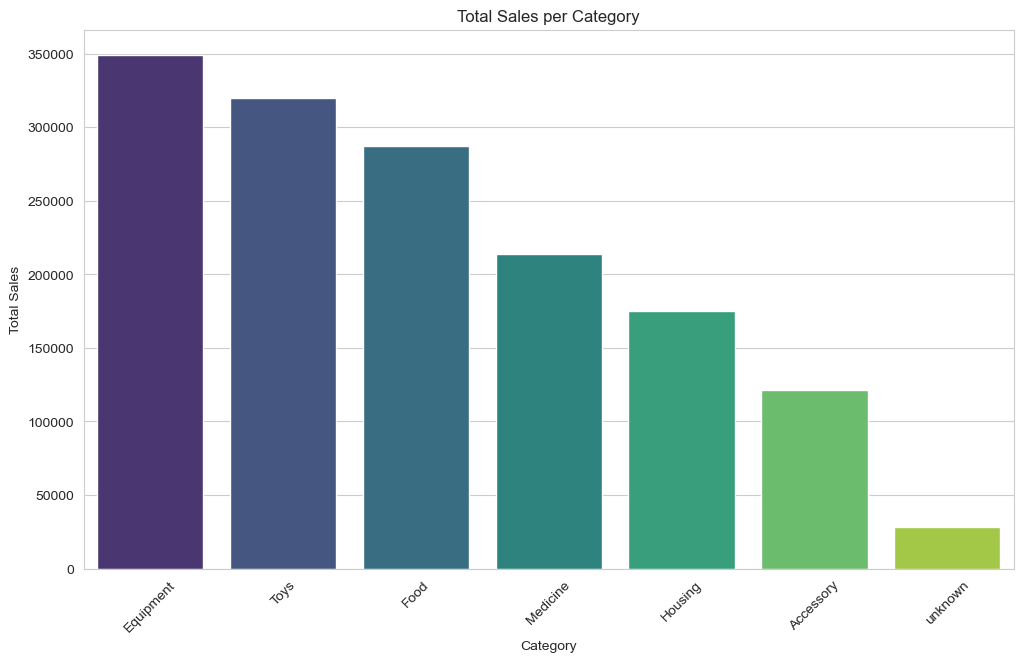

In [85]:
# Calculate total sales per category
sales_per_category = df.groupby('category')['sales'].sum().sort_values(ascending=False)

# Plot total sales per category
plt.figure(figsize=(12, 7))
sns.barplot(x=sales_per_category.index, y=sales_per_category.values, palette='viridis')
plt.title('Total Sales per Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()


The Food category has the Equipment, followed by Toys and Food.
The Unknown category, which is where we placed the unspecified entries, has relatively lower sales.

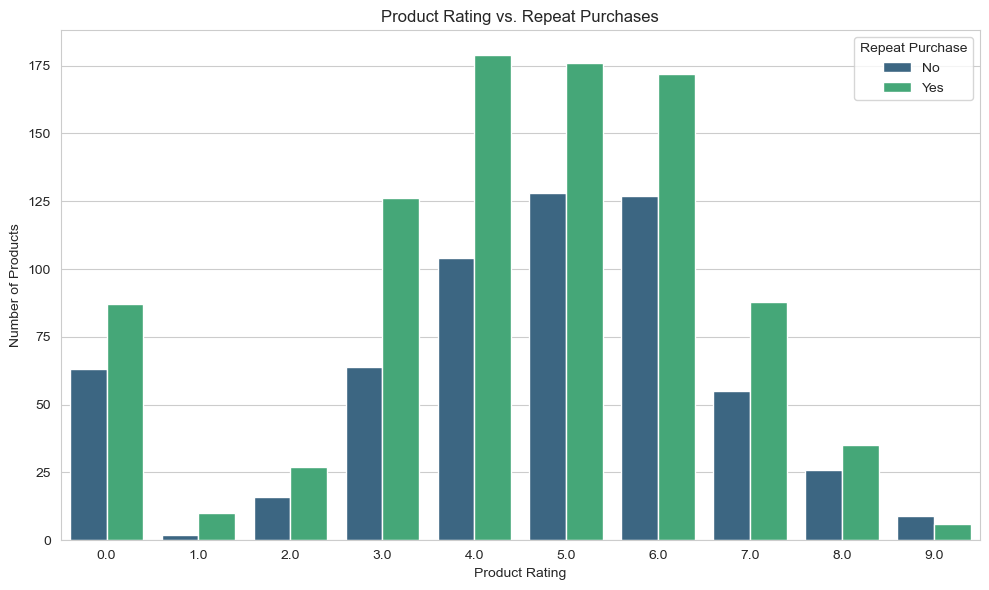

In [89]:
# Plot the relationship between product rating and repeat purchases
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', hue='repeat_purchase', palette='viridis')
plt.title('Product Rating vs. Repeat Purchases')
plt.ylabel('Number of Products')
plt.xlabel('Product Rating')
plt.legend(title='Repeat Purchase', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


####  The graph suggests that products with higher ratings are more likely to have repeat purchases. As shown in the chart, products with a rating of 4.0 are a good example of this trend.

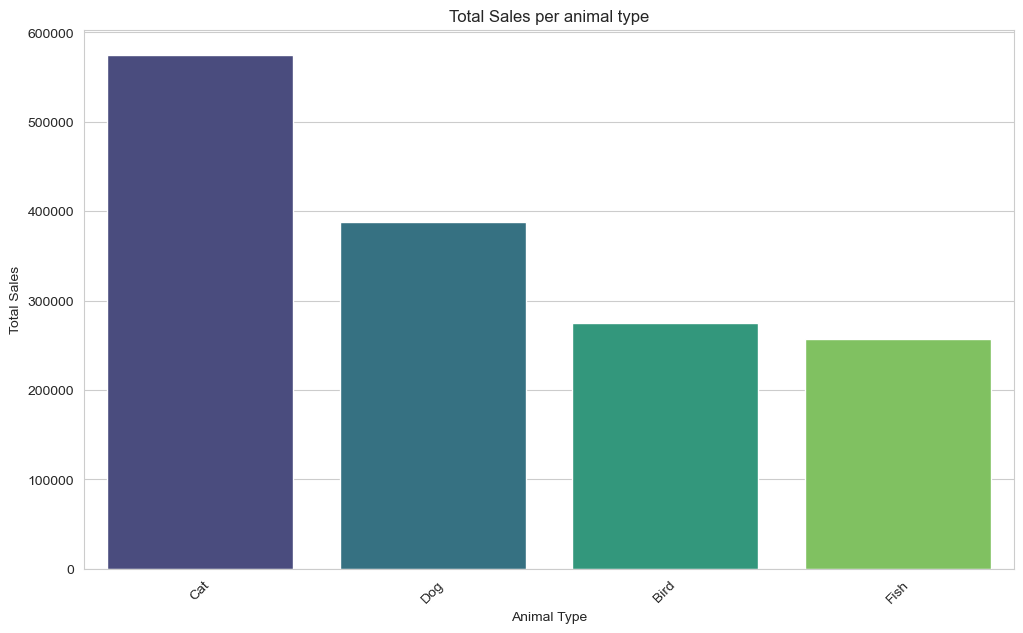

In [88]:
# Calculate total sales per animal type
sales_per_category = df.groupby('animal')['sales'].sum().sort_values(ascending=False)

# Plot total sales per category
plt.figure(figsize=(12, 7))
sns.barplot(x=sales_per_category.index, y=sales_per_category.values, palette='viridis')
plt.title('Total Sales per animal type')
plt.ylabel('Total Sales')
plt.xlabel('Animal Type')
plt.xticks(rotation=45)
plt.show()

####  The cat type had the highest sales, followed by Dog, Bird, and Fish.

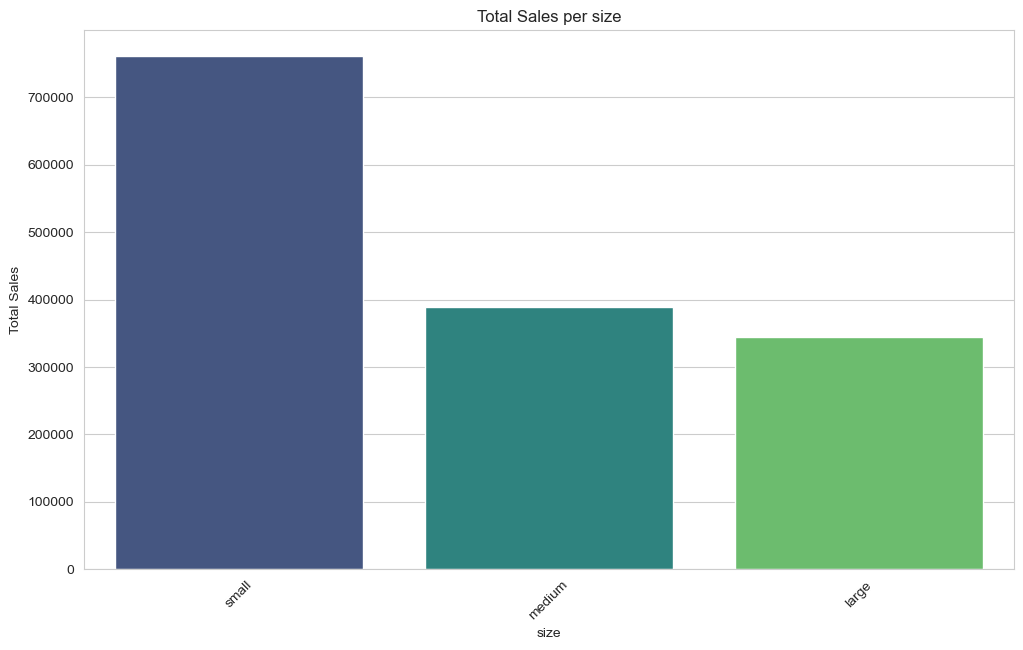

In [87]:
# Calculate total sales per size 
sales_per_category = df.groupby('size')['sales'].sum().sort_values(ascending=False)

# Plot total sales per category
plt.figure(figsize=(12, 7))
sns.barplot(x=sales_per_category.index, y=sales_per_category.values, palette='viridis')
plt.title('Total Sales per size')
plt.ylabel('Total Sales')
plt.xlabel('size')
plt.xticks(rotation=45)
plt.show()

The small size had the highest sales, followed by medium size and then large size.

### MULTIVARIATES ANALYSIS

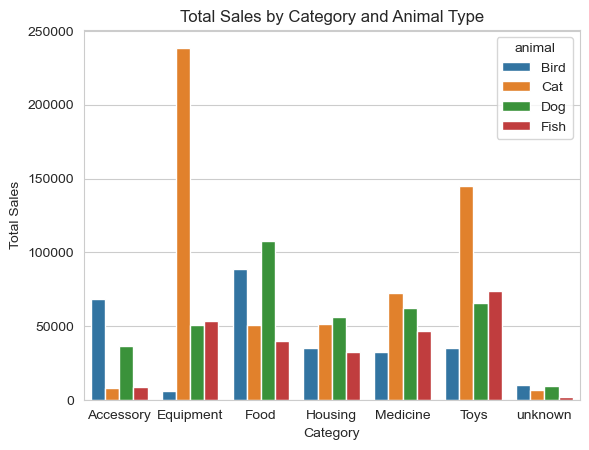

In [90]:
# Group the data by category and animal and calculate the total sales
sales_by_category_animal = df.groupby(['category', 'animal'])['sales'].sum().reset_index()

# Plot the total sales by category and animal using a bar plot
sns.barplot(data=sales_by_category_animal, x='category', y='sales', hue='animal')
plt.title('Total Sales by Category and Animal Type')
plt.xlabel('Category')
plt.ylabel('Total Sales')

plt.show()


The 'Equipment' category has the highest sales for the 'cat' animal type, while the 'Toys' category also has high sales for the 'cat' animal type."